In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [10]:
T = 15
n = 14000
sigma = 0.3
h = 0.1
z = 2
k = int(T//h)
chosen_traj = (0, 4, 19, 49, 79, 99)

In [11]:
def generate_trajectory():
    x_h_2 = np.zeros((2*k+1, 2))
    xi = np.array([np.random.normal(0, sigma*np.sqrt(h/2), 2*k+2),
    np.random.normal(0, sigma*np.sqrt(h/2), 2*k+2)]).T
    for i in range(1,2*k+1):
        x_h_2[i] = x_h_2[i-1] + xi[i]
    return x_h_2

trajectories_h_2 = np.array([generate_trajectory() for _ in range(n)])
trajectories_h = trajectories_h_2[:, ::2]
print(trajectories_h_2.shape, trajectories_h.shape)

(14000, 299, 2) (14000, 150, 2)


C:\Users\Kuzne\AppData\Local\Temp\ipykernel_19144\3343441568.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


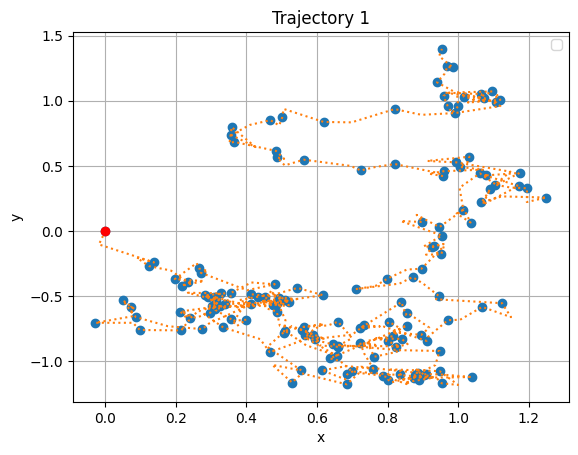

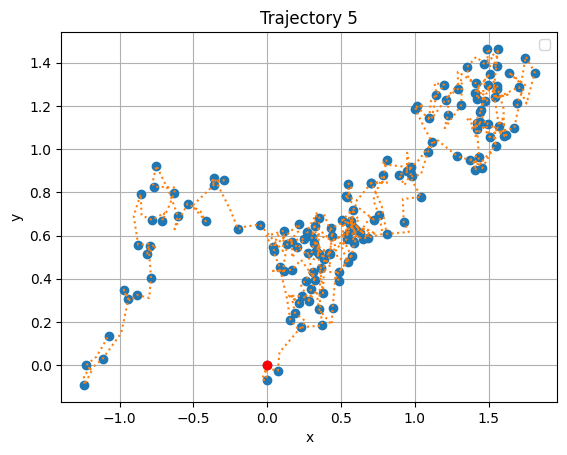

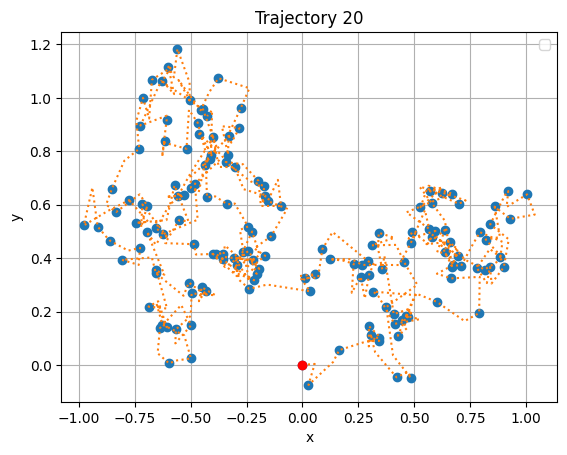

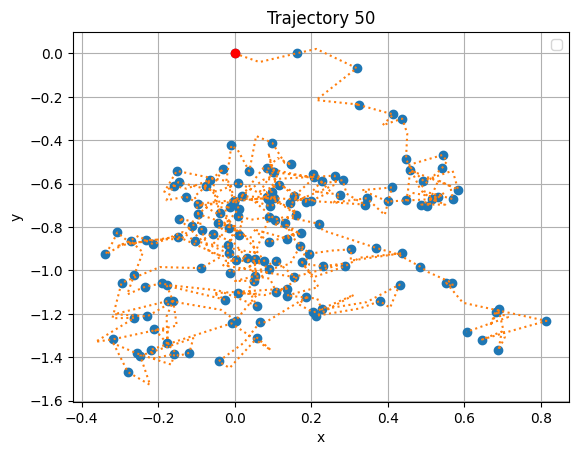

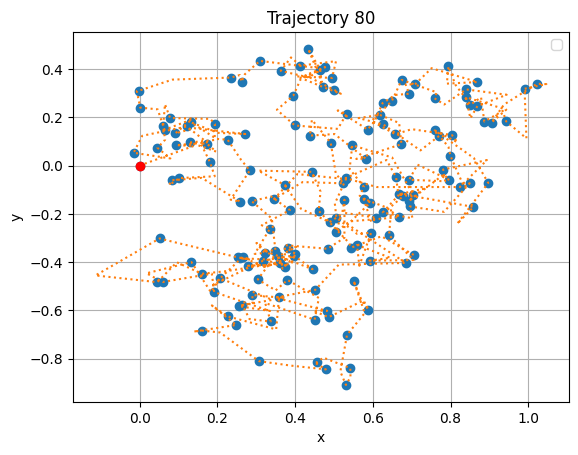

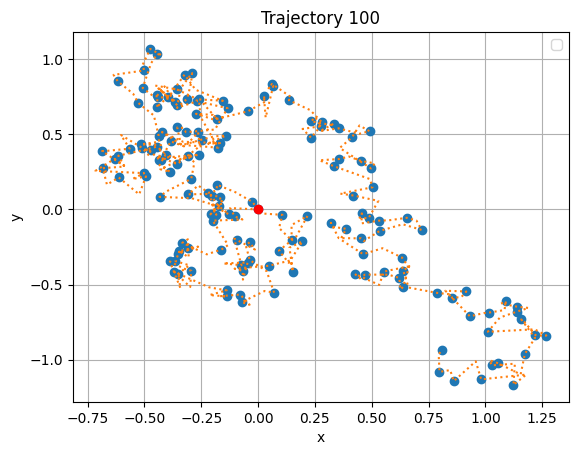

In [12]:
for i, w in enumerate(chosen_traj):
    plt.plot(trajectories_h[w, :, 0], trajectories_h[w, :, 1], 'o')
    plt.plot(trajectories_h_2[w, :, 0], trajectories_h_2[w, :, 1], ':')
    plt.plot(trajectories_h[w, 0, 0], trajectories_h[w, 0, 1], 'o', color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.title(f"Trajectory {w+1}")
    plt.legend()
    plt.show()

In [13]:
trj1 = trajectories_h[chosen_traj, :, :]
diffs = np.diff(trj1, axis=1)
diffs_1 = np.sum(np.abs(diffs), axis=1)
print(diffs_1)

diffs_2 = np.sum(np.abs(diffs)**2, axis=1)
print(diffs_2)

[[10.7648941  11.49889272]
 [11.64028387 11.77347913]
 [11.70279819 11.21541355]
 [11.18102552 11.53901241]
 [10.99452511 10.93372706]
 [11.80669123 11.45723514]]
[[1.26774696 1.43540651]
 [1.30773421 1.60461725]
 [1.37754655 1.3381877 ]
 [1.35991428 1.34289475]
 [1.27923728 1.23376855]
 [1.38936437 1.47937524]]


In [14]:
trj2 = trajectories_h_2[chosen_traj, :, :]
diffs = np.diff(trj2, axis=1)
diffs_1 = np.sum(np.abs(diffs), axis=1)
print(diffs_1)

diffs_2 = np.sum(np.abs(diffs)**2, axis=1)
print(diffs_2)

[[15.55073078 16.1014892 ]
 [15.76913086 16.76644219]
 [16.46668937 16.75218741]
 [15.50758491 16.01517708]
 [15.52082198 15.34344929]
 [16.17448779 16.37293828]]
[[1.30729781 1.35022756]
 [1.34806294 1.41464048]
 [1.38050561 1.44537894]
 [1.28429743 1.26517494]
 [1.29367521 1.21361812]
 [1.35313517 1.4297864 ]]


In [15]:
P = 1 - chi2(2).cdf(z**2/(sigma**2 * T))
print(P)

0.22730069704883127


In [16]:
count = 0
for tr in trajectories_h:
    x = tr[-1]
    if np.sqrt(x[0]**2 + x[1]**2) > z:
        count += 1
print(count/n)

0.22907142857142856
